In [5]:
#-*- coding=utf-8 -*-
import pandas as pd
import pylab
import collections
import numpy as np
import networkx as nx
from collections import defaultdict

In [6]:
Location = r'/Users/zhaojr/Documents/第一篇论文/数据/群体用户detail表.csv'
#df = pd.read_csv(Location,dtype={'user_detail.userid':np.str,'user_detail.following_count':np.int32})
df = pd.read_csv(Location)
df

,user_detail.id,user_detail.userid,user_detail.following_count,user_detail.follower_count,user_detail.voteup_count,user_detail.thanked_count,user_detail.favorited_count,user_detail.answer_count,user_detail.pins_count,user_detail.question_count,...,user_detail.following_topic_count,user_detail.following_columns_count,user_detail.following_question_count,user_detail.following_favlists_count,user_detail.logs_count,user_detail.headline,user_detail.description,user_detail.org_id,user_detail.business_id,user_detail.ctime
0,15881097.0,a948b865f42871dd022d5b235e9ad630,76.0,185.0,1165.0,383.0,1260.0,67.0,0.0,5.0,...,187.0,2.0,120.0,0.0,34.0,丁克界的炫猫狂魔,悲观的理想主义者一本正经地胡说八道,0.0,0.0,0.000000e+00
1,15882269.0,53c63a17e7434cde79573ac34d70fc13,10.0,120.0,246.0,65.0,101.0,15.0,0.0,0.0,...,16.0,4.0,26.0,0.0,0.0,设计、游戏爱好者,NaN,0.0,68.0,0.000000e+00
2,15886777.0,2a66b11e71810f5244c06a291748b79c,1.0,199.0,140.0,23.0,24.0,11.0,0.0,0.0,...,5.0,1.0,13.0,0.0,0.0,NaN,Think Big， Start Small， Move Fast.,0.0,19.0,0.000000e+00
3,15887107.0,32df543aaf8a30cd6f6cf2edf11f9eb2,133.0,26.0,7.0,4.0,0.0,4.0,0.0,2.0,...,57.0,22.0,484.0,4.0,10.0,闭关中,NaN,0.0,54.0,0.000000e+00
4,15888013.0,843a550e9c0372e4c06edced31fb61f6,8.0,86.0,1614.0,455.0,1659.0,17.0,0.0,0.0,...,35.0,1.0,232.0,0.0,0.0,我为小回答而向大问题道歉,NaN,0.0,0.0,0.000000e+00
5,15888254.0,d73ff2e69216b0bca75a742a85a55cb9,54.0,38.0,24.0,4.0,14.0,7.0,0.0,2.0,...,13.0,3.0,43.0,0.0,11.0,啥？,人生就像就一阵风，吹过哪能记得。前面那么好，何必再回头看。,0.0,68.0,0.000000e+00
6,15890119.0,20e29d7eda004bd9f966355ee72a63aa,279.0,34.0,82.0,27.0,35.0,36.0,0.0,3.0,...,59.0,19.0,137.0,1.0,16.0,live long and prosper,live long and prosper,0.0,0.0,0.000000e+00
7,15890492.0,9902bf4ff6cfd6b6be2ac39055bdf505,11.0,34.0,154.0,62.0,88.0,61.0,0.0,0.0,...,93.0,0.0,108.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000e+00
8,15890568.0,cab323bfebb370201009792573ee5869,218.0,34.0,7.0,6.0,4.0,3.0,0.0,0.0,...,10.0,0.0,1.0,0.0,0.0,高中地理教师，自然地理、人文地理、经济地理、以及教育学、心理学等方面比较熟悉。,目前空白！,0.0,0.0,0.000000e+00
9,15890693.0,74c03d64783c29f42a2bd4bcd1f8e7f5,21.0,34.0,48.0,8.0,12.0,18.0,0.0,0.0,...,5.0,4.0,64.0,0.0,1.0,产品经理,NaN,0.0,19.0,0.000000e+00


In [7]:
following = df[['user_detail.following_count']]

In [81]:
following_df = following.dropna()


In [82]:
feature_count_pairs = collections.Counter(list(following_df['user_detail.following_count'])).most_common()

In [83]:
# feature_count_pairs.append((10**-10,683))

In [84]:
feature_count_pairs


[(1.0, 824),
 (2.0, 767),
 (0.0, 683),
 (4.0, 578),
 (3.0, 571),
 (5.0, 539),
 (6.0, 535),
 (7.0, 492),
 (12.0, 478),
 (8.0, 469),
 (11.0, 444),
 (9.0, 440),
 (10.0, 438),
 (13.0, 416),
 (14.0, 408),
 (17.0, 372),
 (15.0, 370),
 (16.0, 331),
 (18.0, 319),
 (19.0, 311),
 (20.0, 306),
 (22.0, 299),
 (21.0, 297),
 (27.0, 288),
 (24.0, 287),
 (31.0, 287),
 (26.0, 284),
 (23.0, 266),
 (25.0, 248),
 (29.0, 244),
 (28.0, 239),
 (42.0, 238),
 (32.0, 225),
 (39.0, 221),
 (30.0, 214),
 (40.0, 212),
 (33.0, 210),
 (36.0, 206),
 (41.0, 205),
 (43.0, 203),
 (35.0, 201),
 (37.0, 196),
 (45.0, 195),
 (38.0, 193),
 (44.0, 193),
 (34.0, 191),
 (50.0, 185),
 (47.0, 180),
 (49.0, 180),
 (46.0, 179),
 (52.0, 169),
 (48.0, 168),
 (51.0, 162),
 (56.0, 157),
 (53.0, 155),
 (63.0, 151),
 (54.0, 150),
 (55.0, 149),
 (57.0, 147),
 (59.0, 143),
 (67.0, 141),
 (62.0, 135),
 (58.0, 134),
 (61.0, 126),
 (60.0, 125),
 (64.0, 123),
 (65.0, 119),
 (71.0, 119),
 (68.0, 118),
 (88.0, 118),
 (66.0, 117),
 (72.0, 117),
 (

In [80]:
feature_count_pairs.remove((0,683))

NameError: name 'feature_count_pairs' is not defined

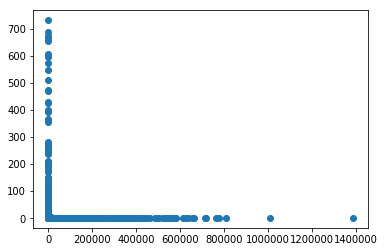

In [441]:
feature_value = zip(*feature_count_pairs)[0]
user_count = zip(*feature_count_pairs)[1]
#user_count = zip(*feature_count_pairs)[1]
#feature_value = zip(*feature_count_pairs)[0]
pylab.scatter(feature_value, user_count)
pylab.show()

In [11]:
import matplotlib.pyplot as plt

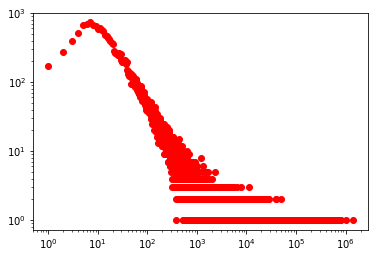

In [453]:
plt.loglog(feature_value,user_count,'ro')
plt.show()

## 最小二乘法一次函数拟合1

In [443]:
len(zip(*feature_count_pairs)[1])

5348

In [446]:
from scipy.optimize import leastsq
###需要拟合的函数func及误差error###
def func(p,x):
    k,b=p
    return k*x+b

def error(p,x,y,s):
    print s
    return func(p,x)-y #x、y都是列表，故返回值也是个列表
s="Test the number of iteration"
p0=[50,2]
Para = leastsq(error,p0,args=(feature_value,user_count,s))
k,b=Para[0]
x=np.linspace(1.8,3.4)
y=k*np.log10(x)+b*x
print k,b

plt.loglog(feature_value,user_count,".")
#plt.plot(feature_value,user_count,'ro',color='blue')
plt.plot(x,y,label="Fitting Line",color='red',linewidth=2) #画拟合直线
plt.legend()
plt.show()

Test the number of iteration


ValueError: operands could not be broadcast together with shapes (267400,) (5348,) 

In [168]:
len(feature_value)

1232

## 线性回归拟合2

('Coefficients:', array([-1.26848133]))
('Intercept:', 4.110894453937088)
Residual sum of squares: 0.08730629


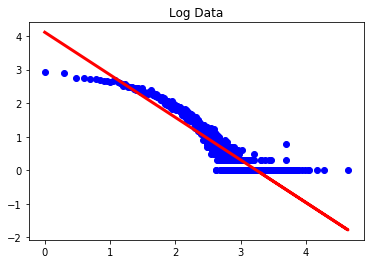

In [176]:
from sklearn import linear_model
def DataFitAndVisualization(X,Y):
    # 模型数据准备
    X_parameter=[]
    Y_parameter=[]
    for x, y in zip(X,Y):
        X_parameter.append([float(x)])
        Y_parameter.append(float(y))

    # 模型拟合
    regr = linear_model.LinearRegression()
    regr.fit(X_parameter, Y_parameter)
    # 模型结果与得分
    print('Coefficients:', regr.coef_,)
    print("Intercept:",regr.intercept_)
    # The mean square error
    print("Residual sum of squares: %.8f"
      % np.mean((regr.predict(X_parameter) - Y_parameter) ** 2))  # 残差平方和

    # 可视化
    plt.title("Log Data")
    plt.scatter(X_parameter, Y_parameter,  color='blue')
    plt.plot(X_parameter, regr.predict(X_parameter), color='red',linewidth=3)

    # plt.xticks(())
    # plt.yticks(())
    plt.show()
    
DataFitAndVisualization(feature_value,user_count)

## 线性拟合3 

In [63]:
z1 = np.polyfit(feature_value,user_count, 1)  #一次多项式拟合，相当于线性拟合
p1 = np.poly1d(z1)
print z1  #[ 1.          1.49333333]
print p1  # 1 x + 1.493

[-1.26848133  4.11089445]
 
-1.268 x + 4.111


In [ ]:
###需要拟合的函数func及误差error###
def func(p,x):
    a,b,c=p
    return a*x**2+b*x+c

def error(p,x,y,s):
    print s
    return func(p,x)-y #x、y都是列表，故返回值也是个列表

#TEST
p0=[5,2,10]
#print( error(p0,Xi,Yi) )

###主函数从此开始###
s="Test the number of iteration" #试验最小二乘法函数leastsq得调用几次error函数才能找到使得均方误差之和最小的a~c
Para=leastsq(error,p0,args=(feature_value,user_count,s)) #把error函数中除了p以外的参数打包到args中
a,b,c=Para[0]
print"a=",a,'\n',"b=",b,"c=",c

###绘图，看拟合效果###
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(feature_value,user_count,color="red",label="Sample Point",linewidth=3) #画样本点
x=np.linspace(0,5,1000)
y=a*x**2+b*x+c
plt.plot(x,y,color="orange",label="Fitting Curve",linewidth=2) #画拟合曲线
plt.legend()
plt.show()

### 最小二乘法

In [155]:
from scipy import linalg
import math
fig = plt.figure()
ax = fig.add_subplot(121)
x = zip(*feature_count_pairs)[0]
y = zip(*feature_count_pairs)[1]
ax.loglog(x,y)
lnx = [math.log(f,math.e) for f in x] # 对x进行对数转换
lny = [math.log(f,math.e) for f in y] # 对y进行对数转换
a = np.mat([lnx,[1]*len(x)]).T # 自变量矩阵a

b = np.mat(lny).T # 因变量矩阵b

(t,res,rank,s) = linalg.lstsq(a,b) # 最小二乘法求系数
print t

[[-1.26848133]
 [ 9.46568429]]


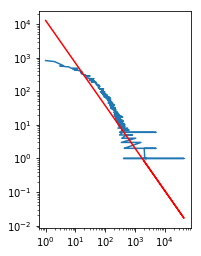

In [156]:
r = t[0][0]

c = t[1][0]

x_ = x

y_ = [math.e**(r*a+c) for a in lnx] # 根据求的的系数求出y*

ax.loglog(x_,y_,"r-") # 绘制拟合的曲线图

plt.show()

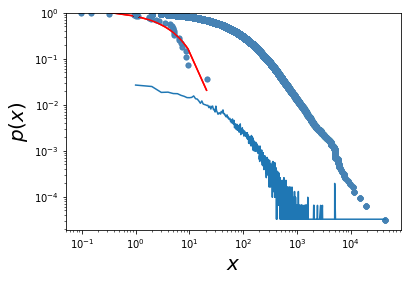

In [86]:
import numpy as np

from operator import itemgetter, attrgetter  
sorted_pairs = sorted(feature_count_pairs, key=itemgetter(0))
#sorted_pairs = sorted(feature_count_pairs,key=lambda pair : feature_count_pairs[1],reverse=False)
#sorted(students, key=lambda student : student[2])
# Create some test data
X  = zip(*sorted_pairs)[0]


# Normalize the data to a proper PDF
Y = zip(*sorted_pairs)[1]
pY = [y/31045.0 for y in zip(*sorted_pairs)[1]]

# Compute the CDF
CY = np.cumsum(Y)
pCY = [y/31045.0 for y in CY]
# Plot both
# plt.plot(X,Y)

plt.loglog(X,pY)

plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


('Coefficients:', array([[-2.04234895]]))
('Intercept:', array([ 1.60731766]))
Residual sum of squares: 0.03806936


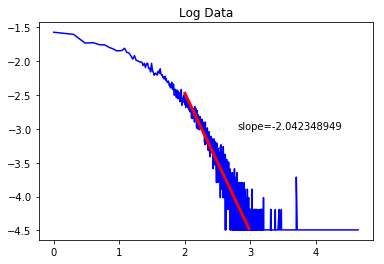

In [88]:
from sklearn import linear_model

# 模型数据准备
logX = []
logpY = []
_logX = []
_logpY = []
#index=intersect(find(logpY>=-4.5),find(logpY));
#xx=x(index);
#yy=y(index);
for x, y in zip(X,pY):
    logX.append([float(np.log10(x))])
    logpY.append([float(np.log10(y))])

for x, y in zip(X[100:850],pY[100:850]):
    _logX.append([float(np.log10(x))])
    _logpY.append([float(np.log10(y))])
    # 模型拟合
regr = linear_model.LinearRegression()
regr.fit(_logX, _logpY)
    # 模型结果与得分
print('Coefficients:', regr.coef_,)
print("Intercept:",regr.intercept_)
# The mean square error
print("Residual sum of squares: %.8f"
      % np.mean((regr.predict(_logX) - _logpY) ** 2))  # 残差平方和

    # 可视化
plt.title("Log Data")

plt.plot(logX,logpY,  color='blue')
plt.plot(_logX, regr.predict(_logX), color='red',linewidth=3)
plt.text(2.8, -3, "slope="+ str(regr.coef_[0][0]) ,fontsize=10);
    # plt.xticks(())
    # plt.yticks(())
plt.show()
    

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


('Coefficients:', array([[-2.00524808]]))
('Intercept:', array([ 1.51607038]))
Residual sum of squares: 0.03744731


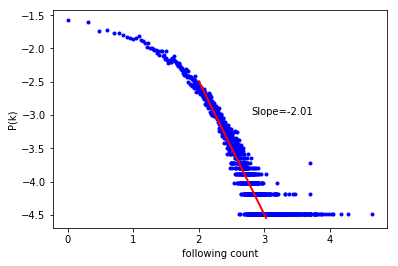

In [89]:
#画图+回归拟合（特征，概率）
def drawpic(X,pY):
    logX = []
    logpY = []
    _logX = []
    _logpY = []
#index=intersect(find(logpY>=-4.5),find(logpY));
#xx=x(index);
#yy=y(index);
    for x, y in zip(X,pY):
        logX.append([float(np.log10(x))])
        logpY.append([float(np.log10(y))])

    for x, y in zip(X[100:900],pY[100:900]): #这里可以调整
        _logX.append([float(np.log10(x))])
        _logpY.append([float(np.log10(y))])
    # 模型拟合
    regr = linear_model.LinearRegression()
    regr.fit(_logX, _logpY)
    # 模型结果与得分
    print('Coefficients:', regr.coef_,)
    print("Intercept:",regr.intercept_)
# The mean square error
    print("Residual sum of squares: %.8f"
      % np.mean((regr.predict(_logX) - _logpY) ** 2))  # 残差平方和

    # 可视化
    #plt.title("following count loglog probability distribution")
    plt.xlabel("following count")
    plt.ylabel("P(k)")
    plt.plot(logX,logpY,".",  color='blue')
    plt.plot(_logX, regr.predict(_logX), color='red',linewidth=2)
    plt.text(2.8, -3, "Slope="+ str(round(regr.coef_[0][0],2)) ,fontsize=10);
    # plt.xticks(())
    # plt.yticks(())
    plt.show()
drawpic(X,pY)

In [347]:
follower = df[['user_detail.follower_count']]
follower_df = follower.dropna()

In [349]:
feature_count_pairs = collections.Counter(list(follower_df['user_detail.follower_count'])).most_common()
#feature_count_pairs.remove((0,683))
sorted_pairs = sorted(feature_count_pairs, key=itemgetter(0))
X  = zip(*sorted_pairs)[0]
# Normalize the data to a proper PDF
Y = zip(*sorted_pairs)[1]
pY = [y/31045.0 for y in zip(*sorted_pairs)[1]]

In [423]:
pY

[0.001707199226928652,
 0.005540344660976002,
 0.00866484135931712,
 0.012659043324206797,
 0.016427766145917216,
 0.021484941214366244,
 0.02216137864390401,
 0.023546464809148012,
 0.021678209051377035,
 0.021098405540344662,
 0.01913351586406829,
 0.019520051538089868,
 0.01845707843453052,
 0.017684007086487357,
 0.015268159123852472,
 0.015107102593010147,
 0.013850861652440007,
 0.013754227733934612,
 0.012820099855049122,
 0.011853760669995168,
 0.011435013689805122,
 0.009083588339507167,
 0.008439362216137865,
 0.008374939603800934,
 0.008310516991464003,
 0.008020615235947817,
 0.007827347398937028,
 0.00860041874698019,
 0.007666290868094701,
 0.008085037848284748,
 0.006667740376872282,
 0.006377838621356096,
 0.006313416009019166,
 0.006410049927524561,
 0.006248993396682235,
 0.006828796907714608,
 0.006410049927524561,
 0.005894669028829119,
 0.006345627315187631,
 0.004863907231438235,
 0.004638428088258979,
 0.004251892414237397,
 0.003929779352552746,
 0.0041230471895

('Coefficients:', array([[-1.21856484]]))
('Intercept:', array([-0.47875166]))
Residual sum of squares: 0.04543129


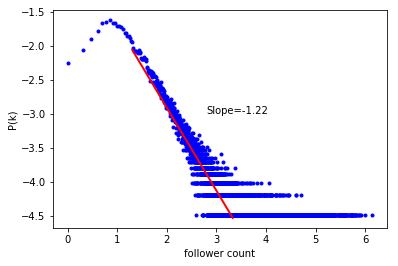

In [362]:
#画图+回归拟合（特征，概率）
def drawpic(X,pY):
    logX = []
    logpY = []
    _logX = []
    _logpY = []
#index=intersect(find(logpY>=-4.5),find(logpY));
#xx=x(index);
#yy=y(index);
    for x, y in zip(X,pY):
        logX.append([float(np.log10(x))])
        logpY.append([float(np.log10(y))])

    for x, y in zip(X[20:1700],pY[20:1700]): #这里可以调整
        _logX.append([float(np.log10(x))])
        _logpY.append([float(np.log10(y))])
    # 模型拟合
    regr = linear_model.LinearRegression()
    regr.fit(_logX, _logpY)
    # 模型结果与得分
    print('Coefficients:', regr.coef_,)
    print("Intercept:",regr.intercept_)
# The mean square error
    print("Residual sum of squares: %.8f"
      % np.mean((regr.predict(_logX) - _logpY) ** 2))  # 残差平方和

    # 可视化
    #plt.title("following count loglog probability distribution")
    plt.xlabel("follower count")
    plt.ylabel("P(k)")
    plt.plot(logX,logpY,".",  color='blue')
    plt.plot(_logX, regr.predict(_logX), color='red',linewidth=2)
    plt.text(2.8, -3, "Slope="+ str(round(regr.coef_[0][0],2)) ,fontsize=10);
    # plt.xticks(())
    # plt.yticks(())
    plt.show()
drawpic(X,pY)

In [396]:
data = list(follower_df['user_detail.follower_count'])

In [393]:
import powerlaw
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)
#R, p = results.distribution_compare('power_law', 'lognormal')

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


1.39682968062
27.0


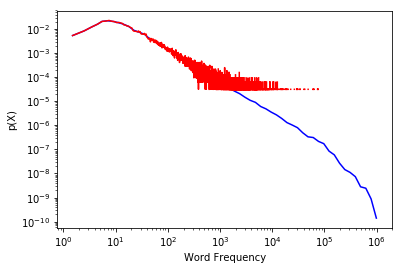

In [421]:
def round_int(x):
    if x == float("inf") or x == float("-inf"):
        return float('nan') # or x or return whatever makes sense
    return int(round(x))
data1 = sorted([round_int(d) for d in data])[53:]
####
figPDF = powerlaw.plot_pdf(data1, color='b')
powerlaw.plot_pdf(data1, linear_bins=True, color='r', ax=figPDF)
####
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Word Frequency")

In [483]:
sorted_pairs = sorted(feature_count_pairs, key=itemgetter(0))

In [487]:
feature_value = zip(*sorted_pairs)[0]
user_count = zip(*sorted_pairs)[1]

In [488]:
feature_value,user_count

((0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0,
  51.0,
  52.0,
  53.0,
  54.0,
  55.0,
  56.0,
  57.0,
  58.0,
  59.0,
  60.0,
  61.0,
  62.0,
  63.0,
  64.0,
  65.0,
  66.0,
  67.0,
  68.0,
  69.0,
  70.0,
  71.0,
  72.0,
  73.0,
  74.0,
  75.0,
  76.0,
  77.0,
  78.0,
  79.0,
  80.0,
  81.0,
  82.0,
  83.0,
  84.0,
  85.0,
  86.0,
  87.0,
  88.0,
  89.0,
  90.0,
  91.0,
  92.0,
  93.0,
  94.0,
  95.0,
  96.0,
  97.0,
  98.0,
  99.0,
  100.0,
  101.0,
  102.0,
  103.0,
  104.0,
  105.0,
  106.0,
  107.0,
  108.0,
  109.0,
  110.0,
  111.0,
  112.0,
  113.0,
  114.0,
  115.0,
  116.0,
  117.0,
  118.0,
  119.0,
  120.0,
  121.0,
  122.0,
  1

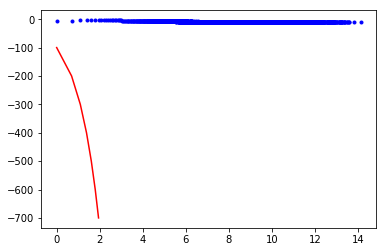

In [517]:
from astropy.modeling import powerlaws,fitting

pY = [n/float(sum(user_count)) for n in user_count]

g_init = models.ExponentialCutoffPowerLaw1D(amplitude=1, x_0=1, alpha=0.01, x_cutoff=0.01)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init,feature_value,pY)
plt.plot(np.log(feature_value),np.log(g(feature_value)),color="red")
plt.plot(np.log(feature_value),np.log(pY),".",color="blue")
#plt.plot(feature_value,pY,".",color="blue")
plt.legend(loc=2)
plt.show()

In [530]:
pY = [n/float(sum(user_count)) for n in user_count]
pY

[0.0016704488149268785,
 0.005421079172970247,
 0.008478315683308119,
 0.012386535552193646,
 0.016074130105900152,
 0.021022440746343924,
 0.02168431669188099,
 0.02303958648512355,
 0.021211548159354512,
 0.020644225920322744,
 0.01872163388804841,
 0.01909984871406959,
 0.018059757942511346,
 0.017303328290468985,
 0.014939485627836611,
 0.014781896116994453,
 0.013552697932425618,
 0.013458144225920322,
 0.012544125063035804,
 0.011598587997982855,
 0.011188855269793243,
 0.00888804841149773,
 0.008257690368129096,
 0.008194654563792234,
 0.00813161875945537,
 0.007847957639939486,
 0.007658850226928896,
 0.008415279878971256,
 0.007501260716086738,
 0.007910993444276348,
 0.006524205748865356,
 0.006240544629349471,
 0.006177508825012607,
 0.006272062531517902,
 0.006114473020675744,
 0.006681795259707514,
 0.006272062531517902,
 0.0057677760968229954,
 0.006209026727181039,
 0.004759203227433182,
 0.0045385779122541605,
 0.00416036308623298,
 0.0038451840645486635,
 0.00403429147

In [ ]:
x, amplitude, x_0, alpha, x_cutoff)	One dimensional exponential cutoff power law model function
(x, amplitude, x_0, alpha, x_cutoff)	One dimensional exponential cutoff power law derivative with respect to parameters

In [451]:
feature_value,user_count

((7.0,
  6.0,
  8.0,
  5.0,
  9.0,
  11.0,
  10.0,
  12.0,
  13.0,
  4.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  3.0,
  19.0,
  20.0,
  21.0,
  2.0,
  27.0,
  22.0,
  23.0,
  24.0,
  29.0,
  25.0,
  26.0,
  28.0,
  35.0,
  30.0,
  33.0,
  36.0,
  31.0,
  38.0,
  32.0,
  34.0,
  37.0,
  1.0,
  39.0,
  40.0,
  44.0,
  41.0,
  47.0,
  43.0,
  49.0,
  52.0,
  42.0,
  45.0,
  48.0,
  50.0,
  54.0,
  55.0,
  58.0,
  56.0,
  51.0,
  60.0,
  63.0,
  46.0,
  59.0,
  53.0,
  64.0,
  75.0,
  57.0,
  70.0,
  61.0,
  73.0,
  74.0,
  62.0,
  66.0,
  78.0,
  79.0,
  72.0,
  84.0,
  65.0,
  68.0,
  76.0,
  67.0,
  82.0,
  69.0,
  86.0,
  71.0,
  85.0,
  80.0,
  87.0,
  83.0,
  98.0,
  81.0,
  90.0,
  99.0,
  0.0,
  77.0,
  88.0,
  91.0,
  94.0,
  100.0,
  121.0,
  101.0,
  116.0,
  107.0,
  95.0,
  89.0,
  109.0,
  102.0,
  104.0,
  110.0,
  112.0,
  119.0,
  92.0,
  93.0,
  114.0,
  120.0,
  142.0,
  103.0,
  111.0,
  96.0,
  105.0,
  127.0,
  129.0,
  97.0,
  113.0,
  115.0,
  140.0,
  108.0,
  1

In [1]:
# import packages
from flownetwork import flownetwork as fn
import networkx as nx
import matplotlib.pyplot as plt

print fn.__version__

/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


$version = 0.0.0.9$


In [2]:
help(fn.powerLawExponentialCutOffPlot)

Help on function powerLawExponentialCutOffPlot in module flownetwork.flownetwork:

powerLawExponentialCutOffPlot(data, xlab, ylab)
    Plot fitted powerLaw distribution with Exponential CutOff



In [98]:
rg = np.array(following_df,dtype=np.float).reshape(1,31728).tolist()[0]

In [99]:
data = np.array(rg)

In [208]:
rg = np.array([ 20.7863444 ,   9.40547933,   8.70934714,   8.62690145,
     7.16978087,   7.02575052,   6.45280959,   6.44755478,
     5.16630287,   5.16092884,   5.15618737,   5.05610068,
     4.87023561,   4.66753197,   4.41807645,   4.2635671 ,
     3.54454372,   2.7087178 ,   2.39016885,   1.9483156 ,
     1.78393238,   1.75432688,   1.12789787,   1.02098332,
     0.92653501,   0.32586582,   0.1514813 ,   0.09722761])

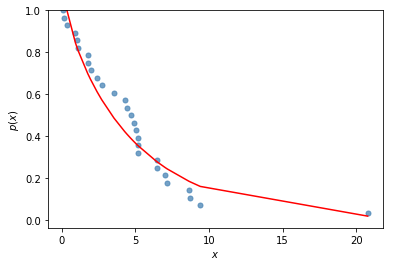

[-0.0099301962503263452, -0.064764460567964116, -0.17705123513352669, 0.89999847894045781]


In [239]:
    t = np.array(sorted(rg,key=lambda x:-x))
    r = np.array(range(len(rg))) +1
    r = r/float(np.max(r))
    y = np.log(r)
    x1 = np.log(t)
    x2 = t
    x = np.column_stack((x1,x2))
    x = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,x).fit()
    L,alpha,lambde = res.params
    r2 = res.rsquared
    plt.plot(t,r,".",color="SteelBlue",alpha=0.75,markersize=10)
    plt.plot(t, t ** (alpha) * np.exp(L+(lambde * t)),"r-")
    #plt.xscale('log'); plt.yscale('log')
    plt.ylim(ymax = 1)
    plt.xlabel("$x$", fontsize = 10)
    plt.ylabel("$p(x)$", fontsize = 10)
    plt.show()
    print [L,alpha,lambde, r2]

In [56]:
fn.powerLawExponentialCutOffPlot(rg, '$x$', '$p(x)$')

[-0.0099301962503263452,
 -0.064764460567964116,
 -0.17705123513352669,
 0.89999847894045781]

In [143]:
sorted_pairs = sorted(feature_count_pairs, key=itemgetter(0),reverse=True)
X  = zip(*sorted_pairs)[0]
# Normalize the data to a proper PDF
Y = zip(*sorted_pairs)[1]
pY = [y/float(sum(Y)) for y in Y]

(43921.0,
 19004.0,
 14627.0,
 11212.0,
 10870.0,
 9657.0,
 8729.0,
 7729.0,
 7323.0,
 7298.0,
 6733.0,
 6415.0,
 6313.0,
 6075.0,
 5960.0,
 5942.0,
 5874.0,
 5698.0,
 5662.0,
 5648.0,
 5643.0,
 5170.0,
 5159.0,
 5000.0,
 4997.0,
 4996.0,
 4994.0,
 4990.0,
 4940.0,
 4920.0,
 4834.0,
 4818.0,
 4721.0,
 4554.0,
 4411.0,
 4309.0,
 4292.0,
 4281.0,
 4233.0,
 4232.0,
 4181.0,
 4179.0,
 4157.0,
 4044.0,
 4003.0,
 3988.0,
 3943.0,
 3920.0,
 3864.0,
 3725.0,
 3623.0,
 3598.0,
 3532.0,
 3518.0,
 3428.0,
 3407.0,
 3320.0,
 3284.0,
 3204.0,
 3193.0,
 3175.0,
 3145.0,
 3144.0,
 3102.0,
 3016.0,
 2980.0,
 2974.0,
 2957.0,
 2863.0,
 2837.0,
 2827.0,
 2826.0,
 2788.0,
 2781.0,
 2751.0,
 2746.0,
 2740.0,
 2626.0,
 2623.0,
 2619.0,
 2533.0,
 2504.0,
 2481.0,
 2430.0,
 2402.0,
 2401.0,
 2398.0,
 2392.0,
 2372.0,
 2324.0,
 2295.0,
 2282.0,
 2281.0,
 2254.0,
 2227.0,
 2214.0,
 2211.0,
 2195.0,
 2183.0,
 2146.0,
 2133.0,
 2129.0,
 2123.0,
 2097.0,
 2090.0,
 2071.0,
 2066.0,
 2063.0,
 2058.0,
 2040.0,
 2038

[[  1.06901478e+01   4.39210000e+04]
 [  9.85240476e+00   1.90040000e+04]
 [  9.59062441e+00   1.46270000e+04]
 ..., 
 [  1.09861229e+00   3.00000000e+00]
 [  6.93147181e-01   2.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]]
[[  1.00000000e+00   1.06901478e+01   4.39210000e+04]
 [  1.00000000e+00   9.85240476e+00   1.90040000e+04]
 [  1.00000000e+00   9.59062441e+00   1.46270000e+04]
 ..., 
 [  1.00000000e+00   1.09861229e+00   3.00000000e+00]
 [  1.00000000e+00   6.93147181e-01   2.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   1.00000000e+00]]


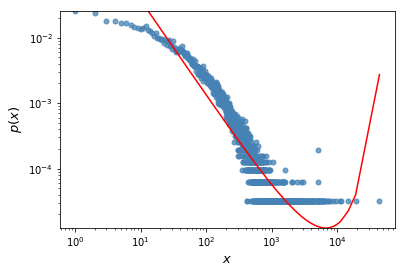

[0.069049188652905547, -1.4569931907946352, 0.00021865979207180735, 0.8698670257301242]


In [245]:
import statsmodels.api as sm
from pylab import *
t = np.array(X[:-1])
#r = np.array(range(len(data))) +1
r = np.array(pY[:-1])    
y = np.log(r)
x1 = np.log(t)
x2 = t
x = np.column_stack((x1,x2))
print x
x = sm.add_constant(x)
print x
res = sm.OLS(y,x).fit()
L,alpha,lambde = res.params
r2 = res.rsquared
plt.plot(t,r,".",color="SteelBlue",alpha=0.75,markersize=10)
plt.plot(t, np.exp(L) * t ** alpha * np.exp(lambde * t),"r-")
plt.xscale('log'); plt.yscale('log')
plt.ylim(0,max(r))
plt.xlabel("$x$", fontsize = 13)
plt.ylabel("$p(x)$", fontsize = 13)
plt.show()
print [L,alpha,lambde, r2]

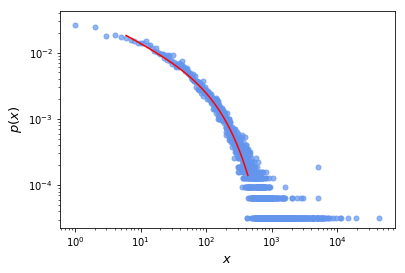

-3.08109625055 -0.498852181515 -0.00640521185939 0.946156859473


In [319]:
import statsmodels.api as sm
from pylab import *
def powerLawExponentialCutOffPlot(datax,datay, xlab, ylab):
    '''
    Plot fitted powerLaw distribution with Exponential CutOff
    '''
    t = datax
    #r = np.array(range(len(data))) +1
    r = datay
    y = np.log(r[800:len(r)])
    x1 = np.log(t[800:len(r)])
    x2 = t[800:len(r)]
    x = np.column_stack((x1,x2))
    x = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,x).fit()
    L,alpha,lambde = res.params
    r2 = res.rsquared
    plt.plot(t,r,".",color="cornflowerblue",alpha=0.7,markersize=10)
    plt.plot(t[800:len(r)-5], (np.exp(L) * t ** alpha * np.exp(lambde * t))[800:len(r)-5],"r-")
    plt.xscale('log'); plt.yscale('log')
    plt.ylim(ymax = 0.043)
    plt.xlabel(xlab, fontsize = 13)
    plt.ylabel(ylab, fontsize = 13)
    plt.show()
    print L,alpha,lambde, r2
powerLawExponentialCutOffPlot(np.array(X[:-1]),np.array(pY[:-1]),"$x$","$p(x)$")

In [112]:
np.exp(L) * t ** alpha * np.exp(lambde * t)

TypeError: 'numpy.float64' object cannot be interpreted as an index

In [126]:
np.dot(np.exp(L),t) ** alpha * np.exp(np.dot(lambde * t))

TypeError: 'numpy.float64' object cannot be interpreted as an index

In [131]:
np.array(t)

array([  1.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
         1.46270000e+04,   1.90040000e+04,   4.39210000e+04])

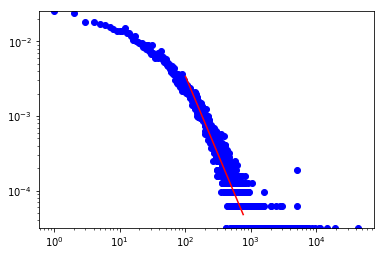

[ 4.02976188 -2.1049944 ] 0.860919273004


In [270]:
%matplotlib inline
from pylab import *
def alloPlot(x,y,col):
    lx = np.log(x[500:len(x)-100])
    ly = np.log(y[500:len(x)-100])
    xx = sm.add_constant(lx, prepend=True)
    res = sm.OLS(ly,xx).fit()
    constant, beta = res.params
    plt.plot(x,y, "o",color="blue")
    plt.plot(x[500:len(x)-100],(np.exp(constant)*x**beta)[500:len(x)-100],color=col)
    plt.xscale('log'); plt.yscale('log')
    #xlim(-2.5, 2.5)
    #xlim(-2,max(x))
    ylim(0,max(y))
    plt.show()
    print res.params,res.rsquared
alloPlot(np.array(X[:-1]),np.array(pY[:-1]),"red")

In [190]:
len(np.array(X[:-1]))

1232